# Задание 3

## Одиночный гармонический сигнал

### Исходный сигнал
Сгенерируем исходный синусоидальный сигнал с помощью библеотек `matplotlib` и `numpy`.

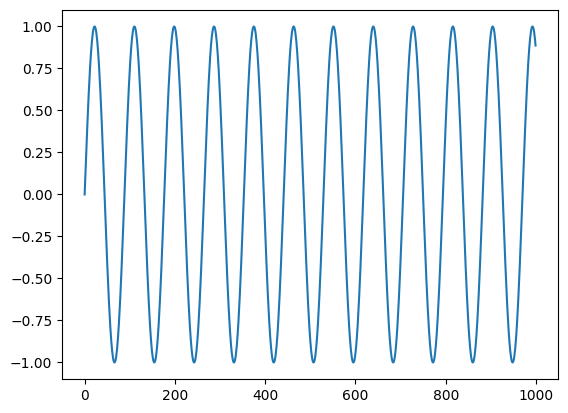

In [27]:
import numpy as np
from matplotlib import pyplot as plt


RATE = 44100  # частота дискретизации
DURATION = 5 # длительность сигнала 

def generate_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.sin(2 * np.pi * frequencies)
    return x, y

_, initial_tone = generate_wave(500, RATE, DURATION)

plt.plot(initial_tone[:1000])
plt.show()

### Спектр исходного сигнала
Получим спектр исходного сигнала с помощью алгоритма Fast Fourier transform. В данном случае используется функция `rfft`, которая находит разложение в ряд фурье только для положительных частот. Функция `rfftfreq` определяет ось x для графика.

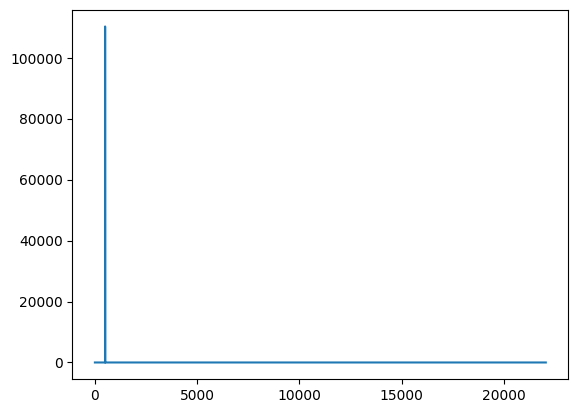

In [28]:
from scipy.fft import rfft, rfftfreq


N = RATE * DURATION

yf = rfft(initial_tone)
xf = rfftfreq(N, 1 / RATE)

plt.plot(xf, np.abs(yf))
plt.show()

### Добавление шума
Добавим к исходному сигналу шум на частоте 3000 Гц. Аплитуда шума в 4 раза меньше амплитуды самого сигнала, чтобы это действительно был "шум".

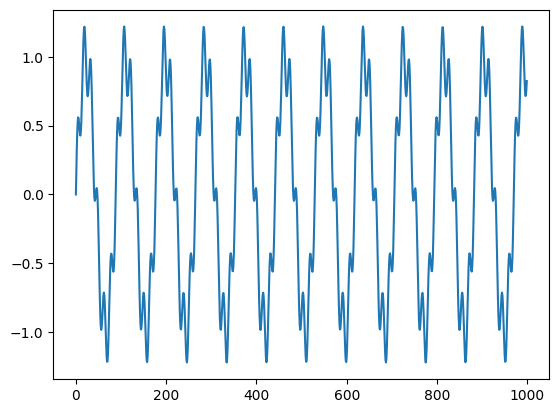

In [29]:
NOISE_FREQUENCY = 3000

_, noise_tone = generate_wave(NOISE_FREQUENCY, RATE, DURATION)
noise_tone = noise_tone * 0.25
output_tone = initial_tone + noise_tone

plt.plot(output_tone[:1000])
plt.show()

### Спектр сигнала с шумом
Аналогично пункту с получением спектра сигнала без шума, получим спектр нового сигнала.

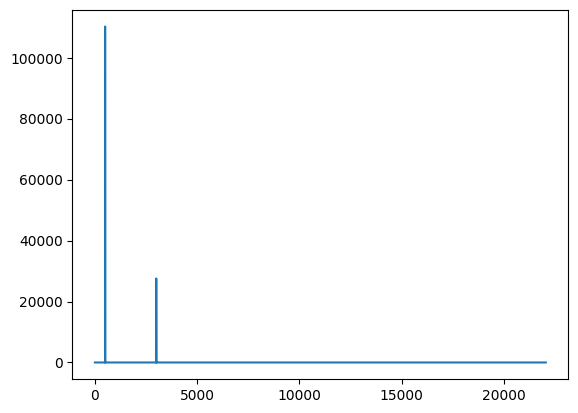

In [30]:
yf = rfft(output_tone)
xf = rfftfreq(N, 1 / RATE)

plt.plot(xf, np.abs(yf))
plt.show()

### Удаление шума
Удалим шум из сигнала. Для начала определим, сколько всего точек на оси x приходится на одну частоту, для этого разделим количество точек на оси на максимальную частоту (она равна половине частоты дискретизации). После этого найдём индекс частоты шума и обнулим значения спектра около этой точки.

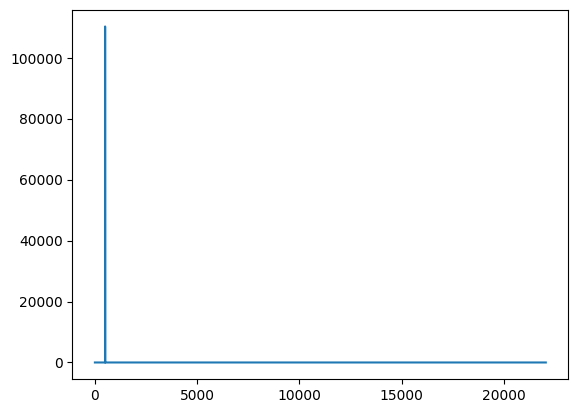

In [31]:
points_per_freq = len(xf) / (RATE / 2)

target_idx = int(points_per_freq * NOISE_FREQUENCY)
yf[target_idx - 5:target_idx + 5] = 0

plt.plot(xf, np.abs(yf))
plt.show()

### Обратное преобразование
С помощью функции `irfft` (обратное преобразование Фурье) преобразуем частотный спектр обратно в сигнал.

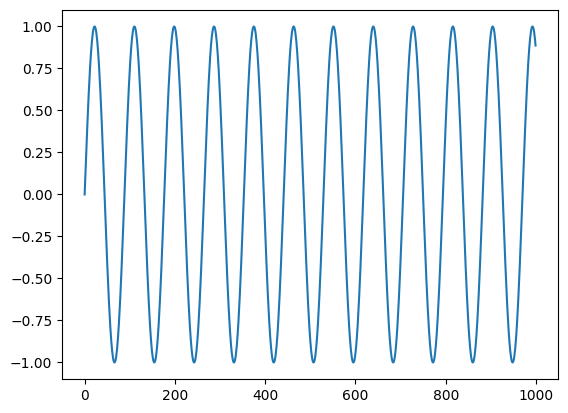

In [17]:
from scipy.fft import irfft


new_signal = irfft(yf)

plt.plot(new_signal[:1000])
plt.show()

## Три гармонических сигнала
В данном примере происходит всё то же самое, что и в примере выше, но обрабатываемый сигнал складывается из трёх других, поэтому я не буду давать комментарии к этому коду.

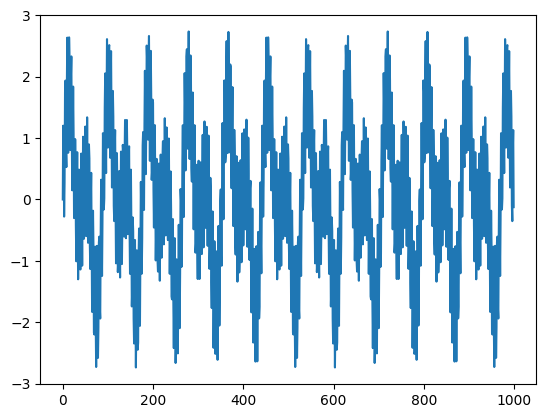

In [20]:
_, tone_1 = generate_wave(500, RATE, DURATION)
_, tone_2 = generate_wave(1000, RATE, DURATION)
_, tone_3 = generate_wave(10000, RATE, DURATION)
initial_tone = tone_1 + tone_2 + tone_3

plt.plot(initial_tone[:1000])
plt.show()

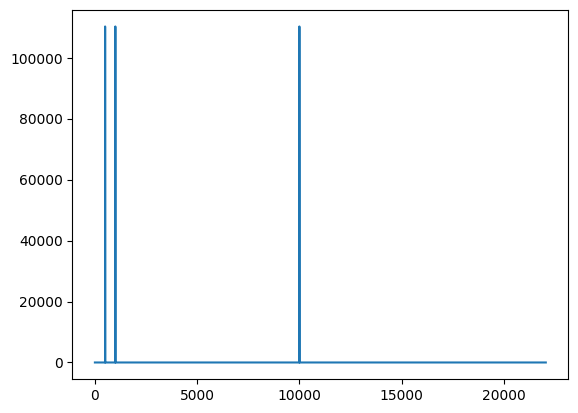

In [21]:
yf = rfft(initial_tone)
xf = rfftfreq(N, 1 / RATE)

plt.plot(xf, np.abs(yf))
plt.show()

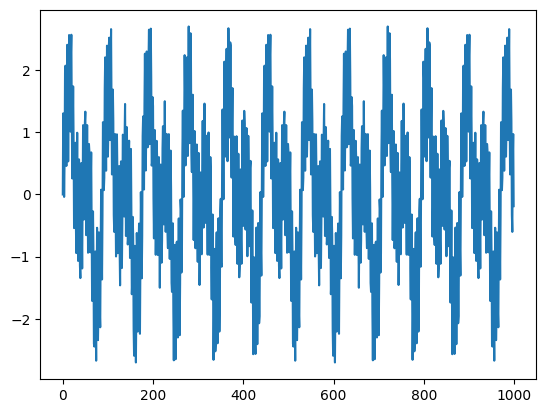

In [22]:
_, noise_tone = generate_wave(NOISE_FREQUENCY, RATE, DURATION)
noise_tone = noise_tone * 0.25
output_tone = initial_tone + noise_tone

plt.plot(output_tone[:1000])
plt.show()

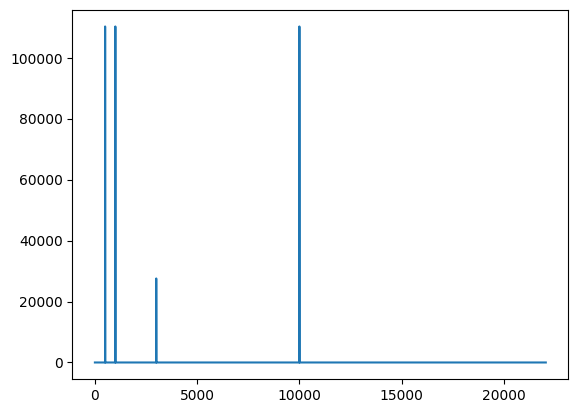

In [23]:
yf = rfft(output_tone)
xf = rfftfreq(N, 1 / RATE)

plt.plot(xf, np.abs(yf))
plt.show()

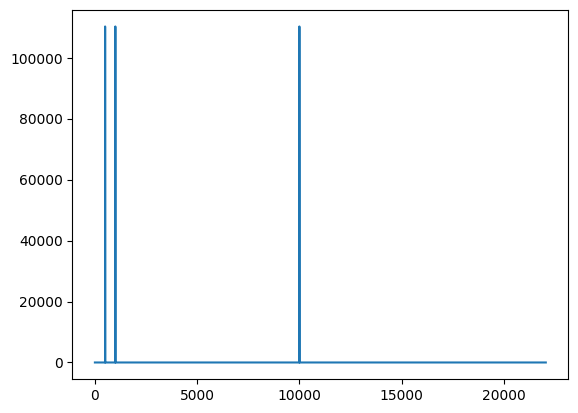

In [24]:
points_per_freq = len(xf) / (RATE / 2)

target_idx = int(points_per_freq * NOISE_FREQUENCY)
yf[target_idx - 5:target_idx + 5] = 0

plt.plot(xf, np.abs(yf))
plt.show()

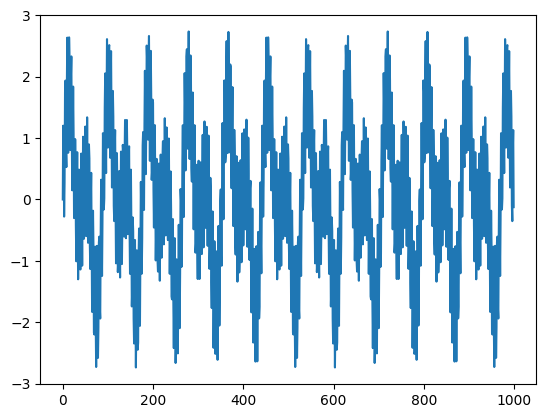

In [25]:
new_signal = irfft(yf)

plt.plot(new_signal[:1000])
plt.show()